# Crítica a las regresiones

* Se presta mucho a interpretaciones muy heterogeneas
* Se presta mucho a parametrizaciones (tipos) que llevan a resultados muy diferentes
* Asumen muchos supuestos que en la practica es imposible que no se violen

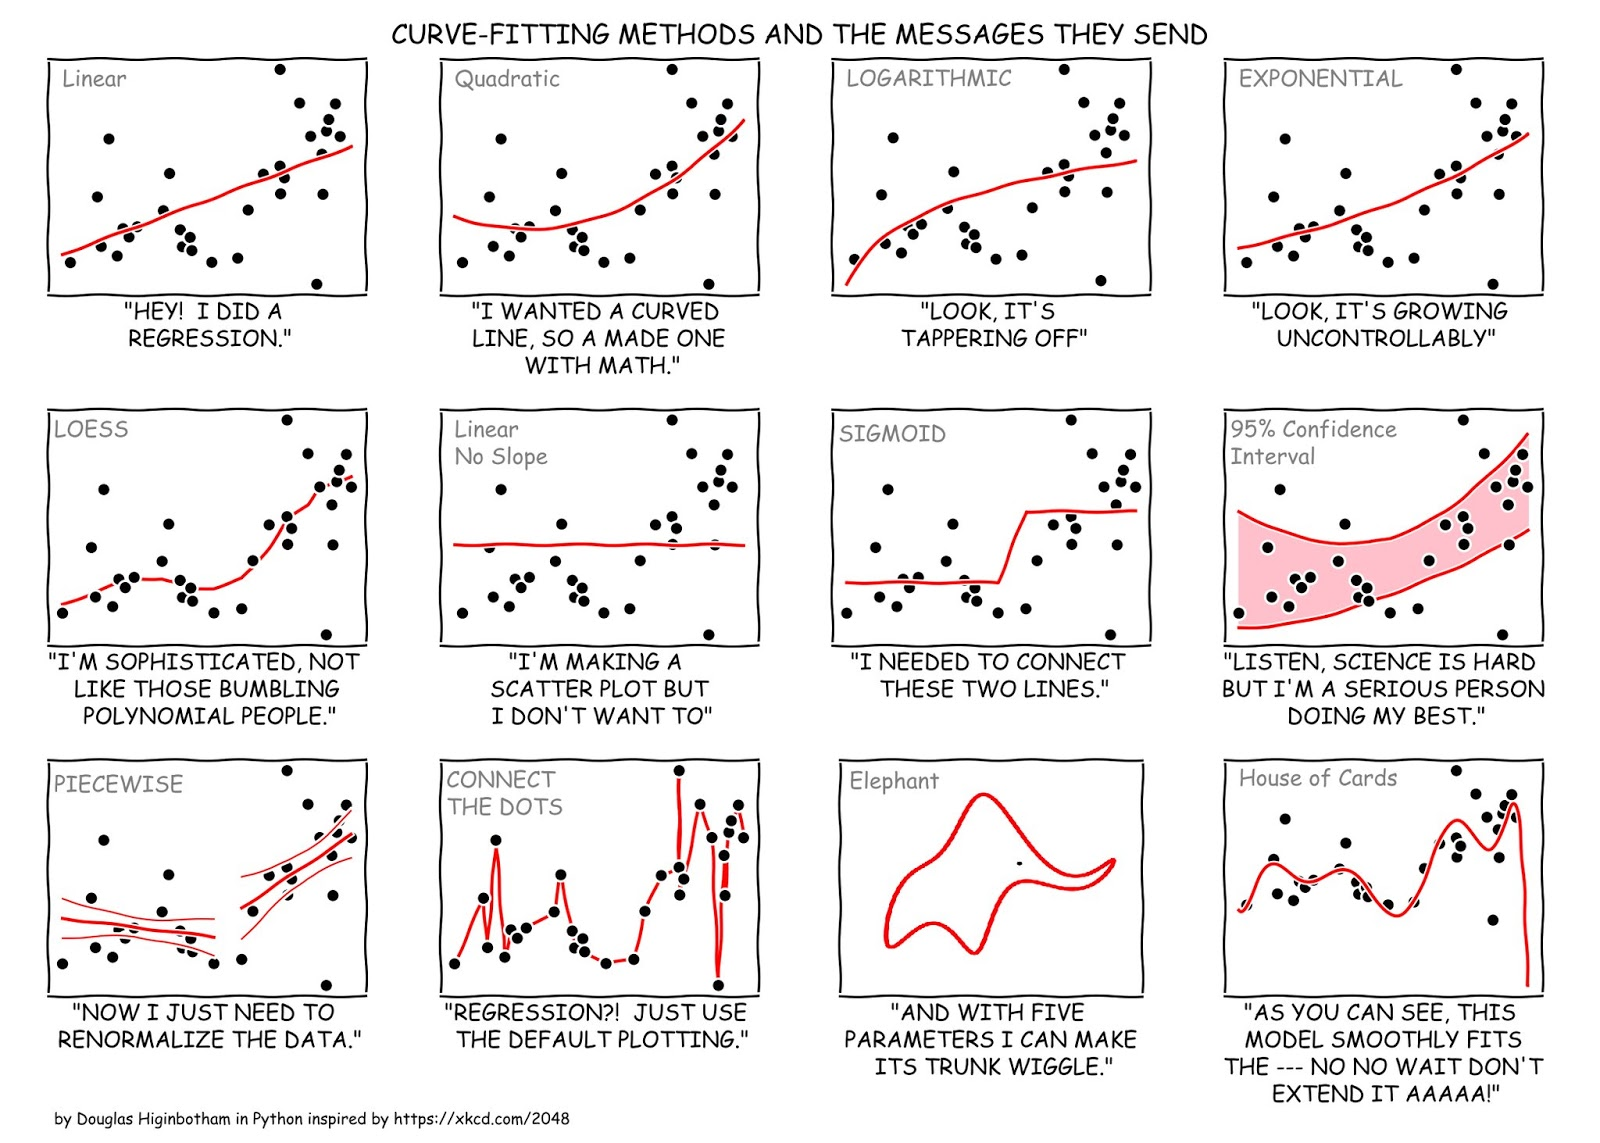

# Aprendizaje Supervisado: Algoritmos de Clasificación

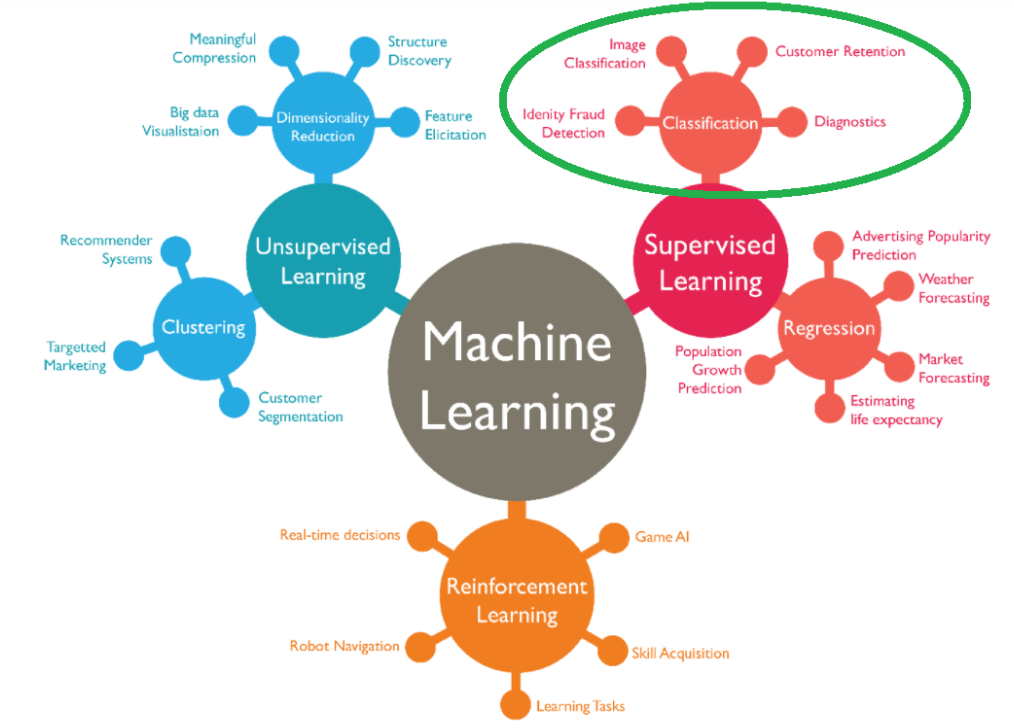

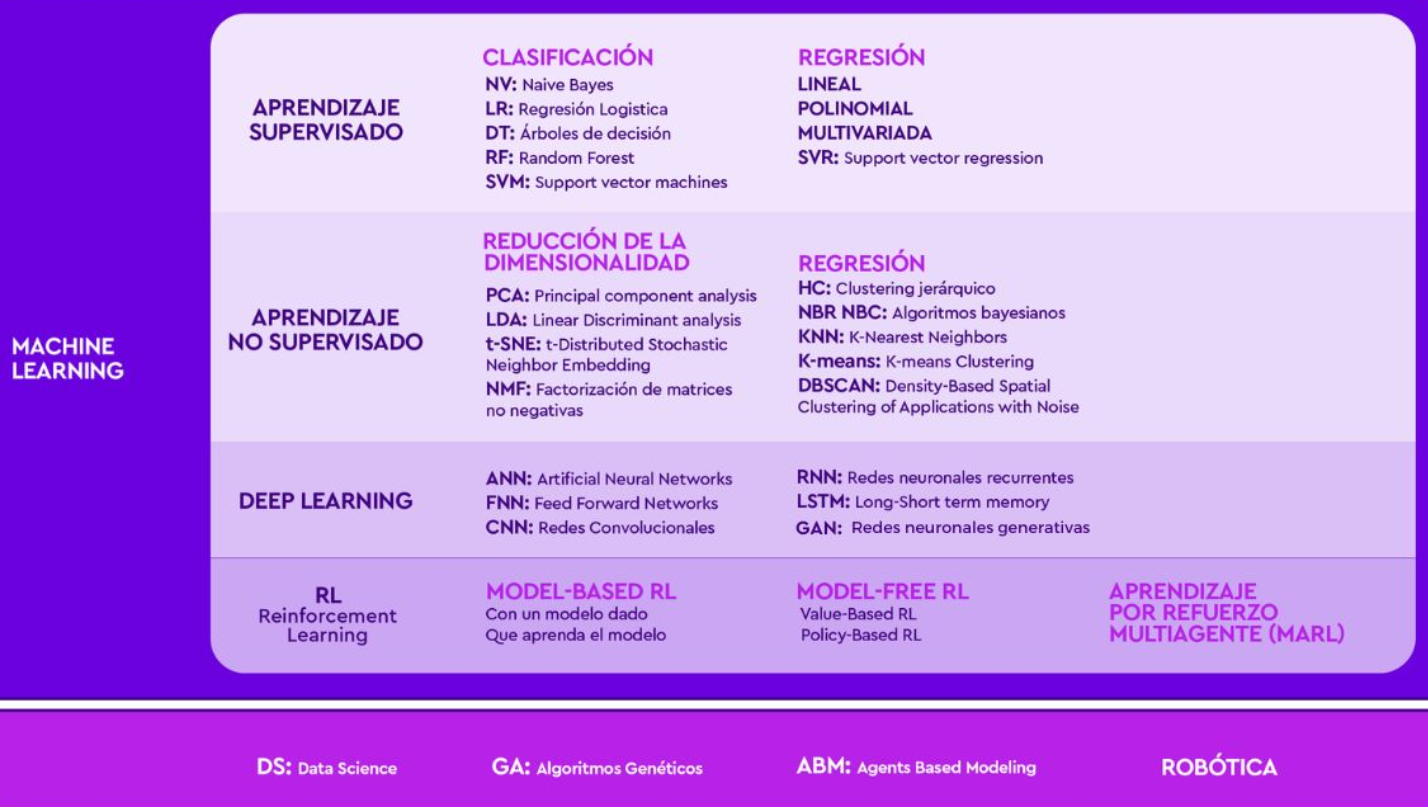

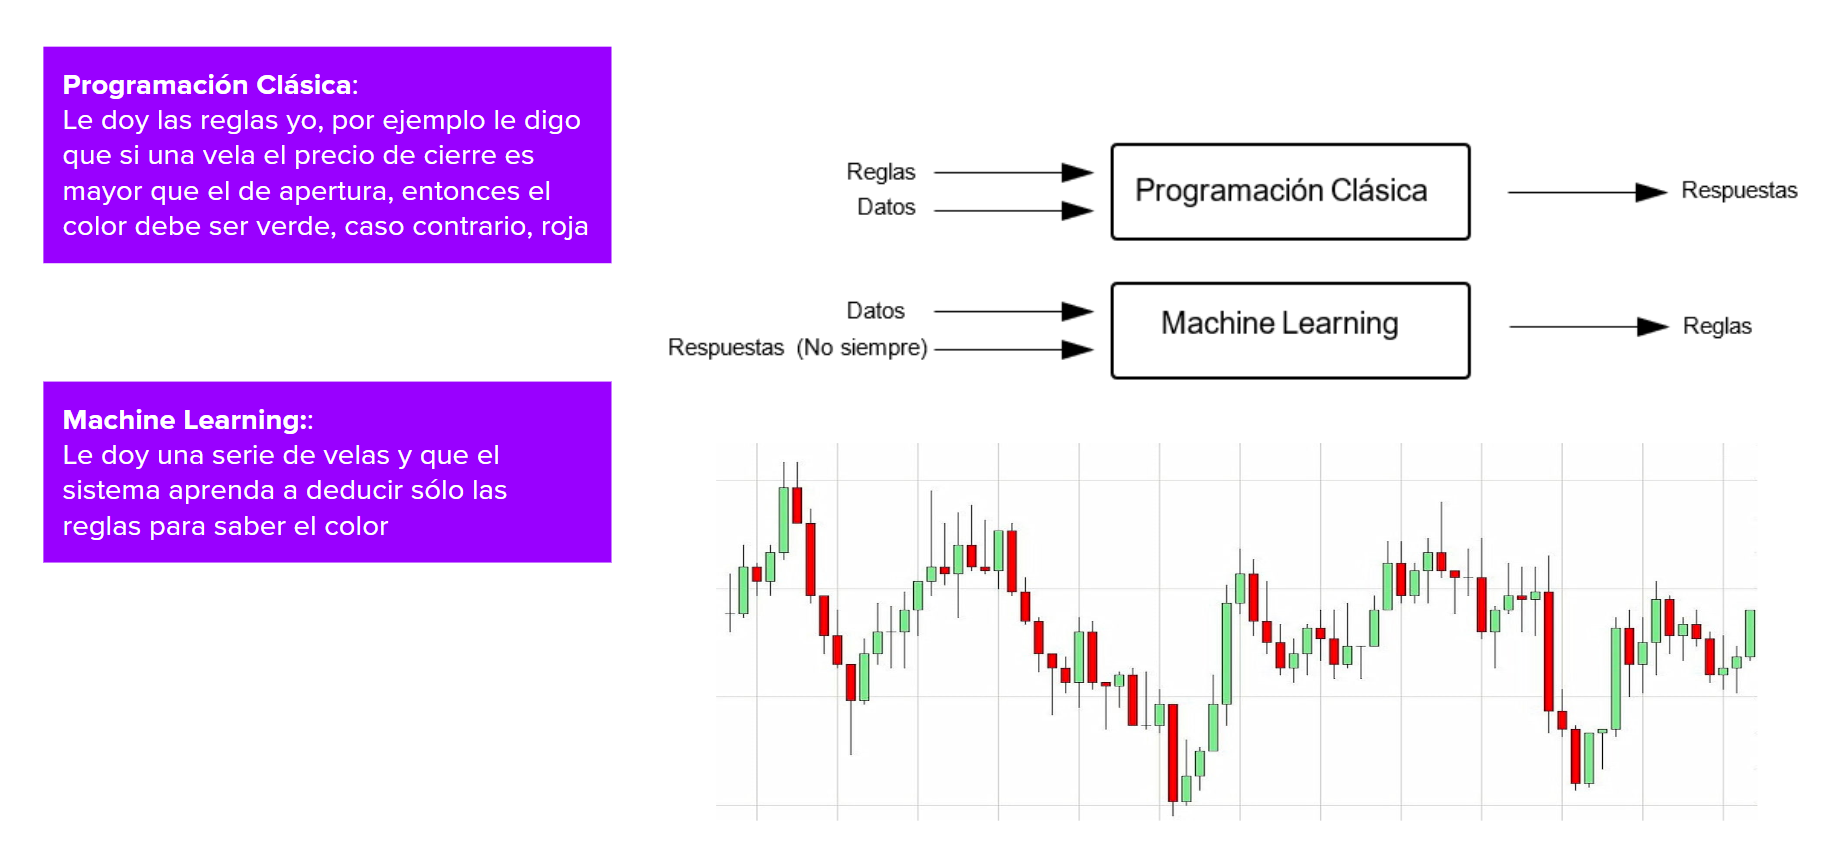

# Importancia de los "features" o predictores

## Construcción de Indicadores

1. Indicadores sobre serie de precios
    * Indicadores tardíos (trend-following)
    * Indicadores de saturación (contrarians)
    * Indicadores absolutos/referencia: Osciladores acotados (sobre precio o sobre indicadores)
2. Indicadores de flujos (volumen y derivados)
3. Indicadores combinados
4. Conteos discretos
5. Estacionalidad
6. Indicadores Estadísticos
7. Referenciales (Benchmarks)
8. Ratios y series de Análisis Fundamental
9. Sentiment
10. Exógenos al mercado

# Importancia de la cantidad de datos

    * Distintas épocas (ej, que tengan bear markets, derrapes fuertes, grandes voladuras, mercados laterales)
    * Variabilidad de activos similares
    * Variabilidad de industrias
    * Variabilidad de países
    * Cantidades de datos acordes al fiting que se pretenda

# Arboles de decisión

Programa de ML que encuentre las preguntas optimas para poder "adivinar" el target con mejor probabilidad de exito

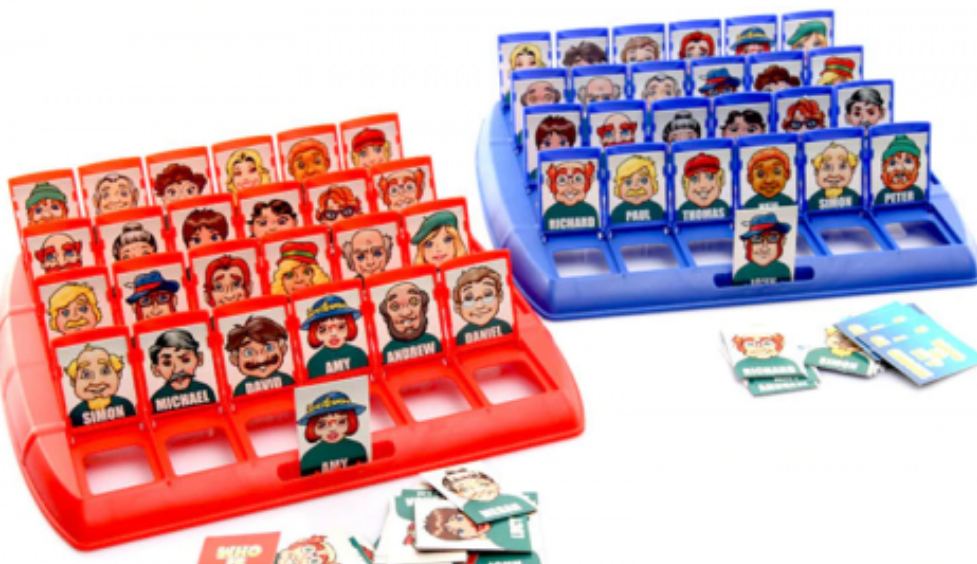

## Ejemplo de salida del algoritmo de ML

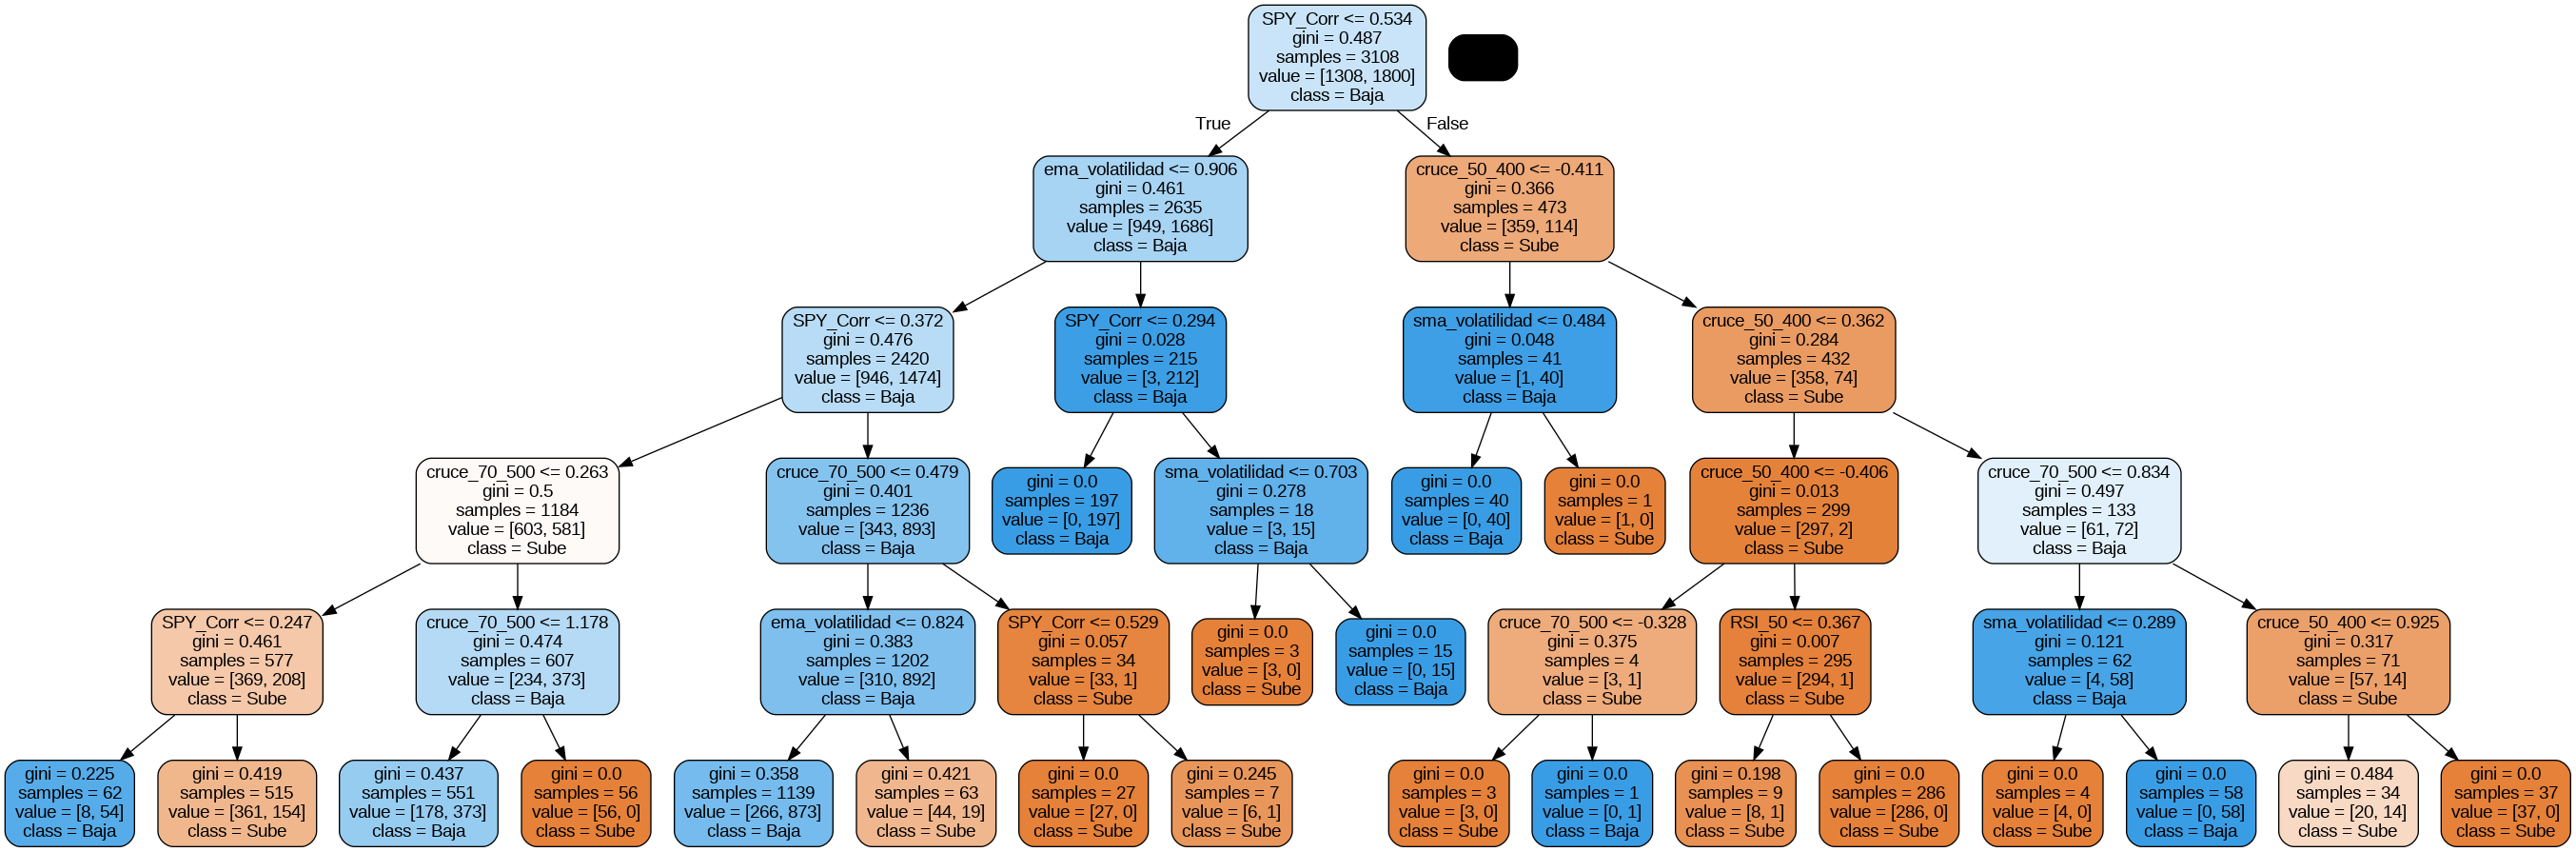

## Preparamos los datos: GGAL + 7 predictores + TARGET

In [ ]:
import yfinance as yf, numpy as np, pandas as pd

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

data = yf.download('GGAL', start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change().rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close   Volume  pctChange  \
Date                                                                         
2000-07-25  14.400023  14.618790  13.795196  14.412891   126200        NaN   
2000-07-26  14.206993  14.464366  14.155518  14.412891    28900   0.000000   
2000-07-27  14.412891  14.515841  14.309942  14.412891    61200   0.000000   
2000-07-28  14.464363  14.464363  14.104041  14.309939   146100  -0.007143   
2000-07-31  14.412888  14.567312  13.898142  14.567312   178400   0.017986   
...               ...        ...        ...        ...      ...        ...   
2023-07-11  16.139999  16.350000  15.750000  16.330000   648400   0.012399   
2023-07-12  16.490000  16.990000  16.370001  16.700001   645000   0.022658   
2023-07-13  16.879999  17.530001  16.760000  17.370001   794800   0.040120   
2023-07-14  17.340000  17.340000  16.120001  16.280001  1051300  -0.062752   
2023-07-17  16.520000  17.575001  16.469999  17.170000   978624   0.054668   

                  fw    RSI_50  sma_volatilidad  ema_volatilidad  SPY_Corr  \
Date                                                                         
2000-07-25 -0.098005       NaN              NaN              NaN       NaN   
2000-07-26 -0.118981       NaN              NaN              NaN       NaN   
2000-07-27 -0.137627       NaN              NaN         0.000000       NaN   
2000-07-28 -0.115577  0.000000              NaN         0.026404       NaN   
2000-07-31 -0.080471  0.718385              NaN         0.069712       NaN   
...              ...       ...              ...              ...       ...   
2023-07-11       NaN  0.594463         0.255737         0.232027 -0.072153   
2023-07-12       NaN  0.602715         0.256057         0.227399 -0.076291   
2023-07-13       NaN  0.617111         0.255087         0.226375 -0.055616   
2023-07-14       NaN  0.582095         0.265256         0.241877 -0.112959   
2023-07-17       NaN  0.600960         0.268586         0.245520 -0.142710   

            cruce_30_100  cruce_50_200  cruce_70_300  
Date                                                  
2000-07-25           NaN           NaN           NaN  
2000-07-26           NaN           NaN           NaN  
2000-07-27           NaN           NaN           NaN  
2000-07-28           NaN           NaN           NaN  
2000-07-31           NaN           NaN           NaN  
...                  ...           ...           ...  
2023-07-11      0.217099      0.274908      0.340017  
2023-07-12      0.228497      0.280539      0.344716  
2023-07-13      0.239973      0.287319      0.350529  
2023-07-14      0.248401      0.292063      0.354830  
2023-07-17      0.257536      0.297834      0.360430  

[5780 rows x 14 columns]

## Definimos lo que vamos a querer predecir

    * Se puede predecir algo binario con probabilidades aprox 50% y 50%
    * Se puede predecir un suceso de cola direccional (ej. que se vuele mas del 50% en un mes)
    * Se puede predecir un evento de cola no direccional (ej. que se mueva +/- 20% en una semana)

    * Se puede contrastar verosimilitud entre predicciones
      Por ejemplo:
      - Hago un modelo que prediga si va a subir o bajar (mas o menos tiene 50% cada opcion)
      - Luego hago otro modelo que prediga la probabilidad que se vuele un 30% el proximo mes
      - Luego contrasto, si el primer modelo me predice que baja y el segundo un 70% de probabilidades que se vuele, algo anda mal

## Examinemos la matriz de diseño X

In [ ]:
data['target'] = 0
data.loc[data.fw >= 0 , 'target'] = 1

data_full = data.copy() # Esto nos va a servir despues cuando necesitemos los de hoy (sin etiquetas aun)
data = data.round(4).dropna()

y = list(data['target']) # y tiene 1 cuando sube y 0 cuando baja a futuro
X = data.iloc[:,-8:-1]

X

RSI_50  sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
Date                                                                           
2001-10-05  0.3407           0.3558           0.3288    0.4239       -0.3351   
2001-10-08  0.3379           0.3536           0.3209    0.4242       -0.3436   
2001-10-09  0.3405           0.3532           0.3167    0.4169       -0.3510   
2001-10-10  0.3556           0.3664           0.3397    0.4838       -0.3605   
2001-10-11  0.3758           0.3849           0.3710    0.5059       -0.3673   
...            ...              ...              ...       ...           ...   
2022-09-21  0.5273           0.2257           0.2005    0.5051        0.0657   
2022-09-22  0.5225           0.2239           0.1964    0.4761        0.0702   
2022-09-23  0.5024           0.2271           0.2023    0.4752        0.0725   
2022-09-26  0.4788           0.2355           0.2133    0.4476        0.0729   
2022-09-27  0.4625           0.2404           0.2163    0.4340        0.0714   

            cruce_50_200  cruce_70_300  
Date                                    
2001-10-05       -0.3715       -0.3030  
2001-10-08       -0.3785       -0.3110  
2001-10-09       -0.3847       -0.3195  
2001-10-10       -0.3902       -0.3278  
2001-10-11       -0.3946       -0.3355  
...                  ...           ...  
2022-09-21       -0.0861       -0.1405  
2022-09-22       -0.0804       -0.1383  
2022-09-23       -0.0748       -0.1367  
2022-09-26       -0.0704       -0.1362  
2022-09-27       -0.0669       -0.1359  

[5281 rows x 7 columns]

## Examinamos el vector target y

In [ ]:
sum(y), len(y), sum(y)/len(y)  # fw positivo, totales, porcentaje positivos

(3164, 5281, 0.599128952849839)

In [ ]:
data['target'].loc[data.target>0].shape

(3164,)

In [ ]:
3164/5281 # son 3164 que suben en un total de 5281 => esta sesgado al alza un 57.2%

0.599128952849839

In [ ]:
# ¿Que porcentaje tengo de positivos sobre totales?
# ¿Que problema habría si estuviera muy desbalanceado?

## Separamos datos de entrenamiento de validación

In [ ]:
len(X), len(y)

(5281, 5281)

In [ ]:
from sklearn.model_selection import train_test_split


# Disclaimer, esto para series con features autoregresivos como las medias moviles largas no esta del todo bien
# Si se usan este tipo de features hay que pensar un pipeline mas adecuado (ej. usar cross validation),
# o incluso no usar random split para series de tiempo si uno es mas estricto
# Hacemos este ejemplo asi por una cuestion didactica pero no usar esto en la vida real ni ahi :)

# Entrenamos con el 85% de los datos al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
X_train

RSI_50  sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
Date                                                                           
2007-05-04  0.5461           0.1555           0.1114    0.6662        0.0789   
2010-07-26  0.5510           0.1833           0.1451    0.6309        0.0392   
2010-05-28  0.4978           0.2303           0.2301    0.8645        0.0428   
2017-04-05  0.6353           0.1332           0.1154    0.2050        0.1353   
2020-11-27  0.5180           0.2865           0.2608    0.4307       -0.1764   
...            ...              ...              ...       ...           ...   
2020-06-02  0.4866           0.4395           0.4193    0.1574       -0.2345   
2010-06-07  0.4905           0.2354           0.2255    0.8632        0.0220   
2012-07-27  0.4504           0.1919           0.1806    0.5486       -0.1462   
2021-07-30  0.4672           0.1917           0.1603    0.3191        0.0370   
2006-04-26  0.5054           0.0942           0.0763    0.3240        0.0431   

            cruce_50_200  cruce_70_300  
Date                                    
2007-05-04        0.2379        0.2873  
2010-07-26        0.0365        0.1869  
2010-05-28        0.1144        0.2727  
2017-04-05        0.1234        0.1063  
2020-11-27       -0.1948       -0.2421  
...                  ...           ...  
2020-06-02       -0.3526       -0.5137  
2010-06-07        0.0955        0.2669  
2012-07-27       -0.2860       -0.4157  
2021-07-30        0.0969       -0.0164  
2006-04-26       -0.0285       -0.0607  

[4488 rows x 7 columns]

In [ ]:
# Una idea para evitar data-leak seria por ejemplo:
# entrenamiento 0-500   ventana ciega 500-800   validacion 800-1000   ventana ciega 1000-1300
# entrenamiento 1300-1800   ventana ciega 1800-2100   validacion 2100-2300   ventana ciega

In [ ]:
# Dejo un ejemplo super burdo de split para que luego prueben las diferencias de haber tenido data-leak

#X_train, X_test = X.iloc[:4500], X.iloc[4500:]
#y_train, y_test = y[:4500], y[4500:]

# ¿Que trampa estoy haciendo usando predictores muy largos autoregresivos para predecir?

In [ ]:
len(X_train), len(X_test)

(4488, 793)

## Importamos el modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=1) # por default es gini, otros entropy
modelo

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

Parámetros importantes:
    
* criterion: entropy/gini
* <b>max_depth</b>: Cantidad de subnodos desde cada hilo ppal (profundidad)
* random_state

$$ {\text{Ganancia de información, Entropia}}(S)= \large - \sum _{i=1}^{n}p_{i}\log _{2}p_{i} $$

$$ {\text{Impureza de Gini} \hspace{0.5cm}  \large I_{G}(p)=\sum _{i=1}^{m}p_{i}(1-p_{i})=\sum _{i=1}^{m}(p_{i}-{p_{i}}^{2})=1-\sum _{i=1}^{m}{p_{i}}^{2}} $$

Ver Shannon y Weaber formulacion matematica de la teoría de la información

## Entrenamiento

In [ ]:
%%time
modelo.fit(X_train, y_train)
modelo

CPU times: total: 15.6 ms
Wall time: 36.4 ms


DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)

## Corremos el modelo para predecir

In [ ]:
# Aca le tomo examen al modelo:
    # 1- le pido que prediga los X out of sample, que no use para entrenar
    # 2- Como yo tenia los fw de esos X, corroboro si predice bien..

y_pred = modelo.predict(X_test)
y_pred[:50]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1])

In [ ]:
X_test.iloc[:3]

RSI_50  sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
Date                                                                           
2010-09-15  0.6277           0.1947           0.1775    0.2612        0.2309   
2004-12-07  0.5192           0.2044           0.1729    0.1680        0.2183   
2013-01-07  0.5772           0.2701           0.2445    0.2668        0.1128   

            cruce_50_200  cruce_70_300  
Date                                    
2010-09-15        0.2208        0.2558  
2004-12-07        0.1388        0.0590  
2013-01-07        0.0741       -0.0364

In [ ]:
y_test[:3]

[1, 1, 1]

In [ ]:
# Vemos cuantas predicciones hace de baja y cuantas de suba:
pd.DataFrame(y_pred).groupby(0).size()

0
0    234
1    559
dtype: int64

In [ ]:
# Vemos cuantas predicciones de baja y cuantas de suba tenia en su entrenamiento:
pd.DataFrame(y_train).groupby(0).size()

0
0    1821
1    2667
dtype: int64

## Obtenemos las probabilidades de las predicciones

In [ ]:
y_pred[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
modelo.predict_proba(X_test)[:10]

array([[0.06896552, 0.93103448],
       [0.06896552, 0.93103448],
       [0.17048346, 0.82951654],
       [0.71161826, 0.28838174],
       [0.00793651, 0.99206349],
       [0.45996441, 0.54003559],
       [0.32291667, 0.67708333],
       [0.27358491, 0.72641509],
       [0.17048346, 0.82951654],
       [0.        , 1.        ]])

## Matriz de Confusión

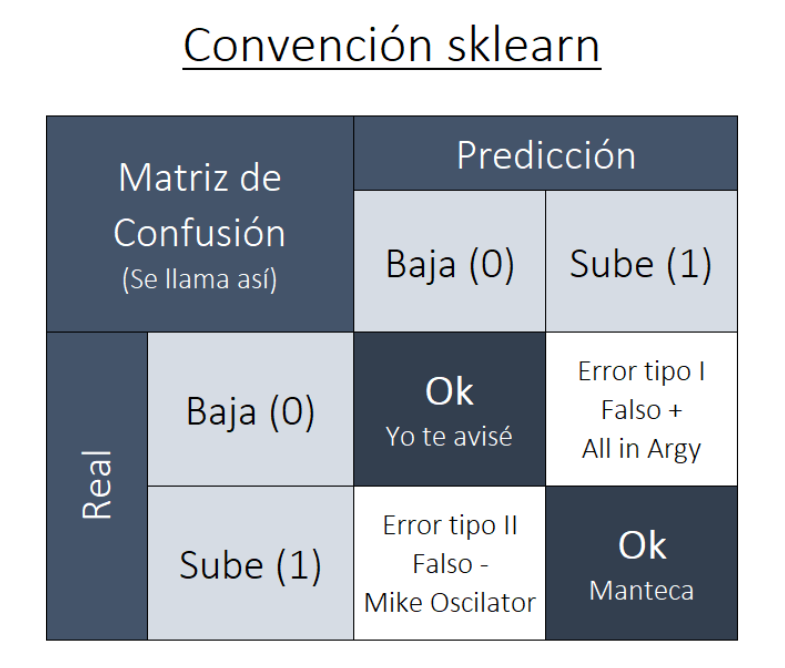

### Matriz de confusión "a mano"

In [ ]:
resultados = list(zip(y_test, y_pred))

manteca = 0
mike = 0
yoteavise = 0
allin = 0

for real, prediccion in resultados:

    if (real==0) & (prediccion==0):
        # Verdaderos negativos
        yoteavise += 1
    if (real==0) & (prediccion==1):
        # Falsos positivos
        allin += 1
    if (real==1) & (prediccion==0):
        # Falsos negativos
        mike +=1
    if (real==1) & (prediccion==1):
        # Verdaderos positivos
        manteca +=1


yoteavise, allin, mike, manteca

(179, 117, 55, 442)

In [ ]:
res = np.array([yoteavise, allin, mike, manteca])
print (f"{(res / res.sum()).round(2)*100}")

[23. 15.  7. 56.]


In [ ]:
# conda update scikit-learn

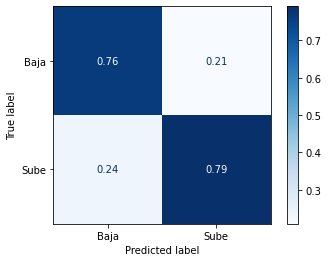

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, normalize='pred',
                                             display_labels=['Baja','Sube'], cmap='Blues')


m = disp.confusion_matrix

In [ ]:
m

array([[0.76495726, 0.20930233],
       [0.23504274, 0.79069767]])

## Normalizado de matriz de confusión

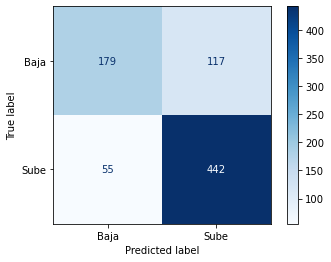

In [ ]:
# Sin normalizar
disp = ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, normalize=None,
                                             display_labels=['Baja','Sube'], cmap='Blues')

In [ ]:
# Normalizando toda la matriz de una
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred,  normalize='all')
cm

array([[0.22572509, 0.14754098],
       [0.06935687, 0.55737705]])

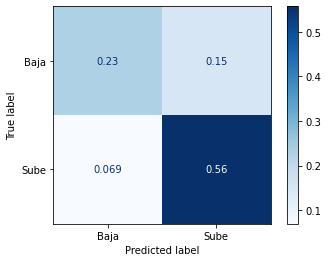

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, normalize='all',
                                             display_labels=['Baja','Sube'], cmap='Blues')

In [ ]:
m = np.array(confusion_matrix(y_test, y_pred, normalize='pred'))
m

array([[0.76495726, 0.20930233],
       [0.23504274, 0.79069767]])

In [ ]:
m = np.array(confusion_matrix(y_test, y_pred, normalize='true'))
m

array([[0.60472973, 0.39527027],
       [0.11066398, 0.88933602]])

In [ ]:
from sklearn.metrics import confusion_matrix

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

matriz = {'manteca':m[1][1], 'mike oscilator':m[1][0],'all in':m[0][1], 'yo te avise':m[0][0]}

resumen = {'aciertos' : f"{matriz['manteca']+matriz['yo te avise']:.1%}",
           'sesgo +': f"{matriz['manteca']+matriz['all in']:.1%}"}

print('Arboles de decisión: \n',m,'\nPorcentajes:\n',matriz,'\n',resumen)

Arboles de decisión: 
 [[0.23 0.15]
 [0.07 0.56]] 
Porcentajes:
 {'manteca': 0.56, 'mike oscilator': 0.07, 'all in': 0.15, 'yo te avise': 0.23} 
 {'aciertos': '79.0%', 'sesgo +': '71.0%'}


### Ojo con la definición de tuplas

Si definimos una tupla como x=(1), me va a asignar el entero 1 a la variable "x"

Si quisiera que me asigne la tupla con el valor 1 como único valor debo poner x=(1,)

In [ ]:
a = 5
b = (5)
c = (5,)

In [ ]:
type(a), type(b), type(c)

(int, int, tuple)

In [ ]:
# Si quisiera pasar un parametro que sea una tupla de una única lista?
([1,2,3,4],)

([1, 2, 3, 4],)

## Vemos predicción de algún valor

In [ ]:
# Los predictores
X

RSI_50  sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
Date                                                                           
2001-10-05  0.3407           0.3558           0.3288    0.4239       -0.3351   
2001-10-08  0.3379           0.3536           0.3209    0.4242       -0.3436   
2001-10-09  0.3405           0.3532           0.3167    0.4169       -0.3510   
2001-10-10  0.3556           0.3664           0.3397    0.4838       -0.3605   
2001-10-11  0.3758           0.3849           0.3710    0.5059       -0.3673   
...            ...              ...              ...       ...           ...   
2022-09-21  0.5273           0.2257           0.2005    0.5051        0.0657   
2022-09-22  0.5225           0.2239           0.1964    0.4761        0.0702   
2022-09-23  0.5024           0.2271           0.2023    0.4752        0.0725   
2022-09-26  0.4788           0.2355           0.2133    0.4476        0.0729   
2022-09-27  0.4625           0.2404           0.2163    0.4340        0.0714   

            cruce_50_200  cruce_70_300  
Date                                    
2001-10-05       -0.3715       -0.3030  
2001-10-08       -0.3785       -0.3110  
2001-10-09       -0.3847       -0.3195  
2001-10-10       -0.3902       -0.3278  
2001-10-11       -0.3946       -0.3355  
...                  ...           ...  
2022-09-21       -0.0861       -0.1405  
2022-09-22       -0.0804       -0.1383  
2022-09-23       -0.0748       -0.1367  
2022-09-26       -0.0704       -0.1362  
2022-09-27       -0.0669       -0.1359  

[5281 rows x 7 columns]

In [ ]:
# Los predictores completos (sin el dropna que me borraba los ultimos que no tienen FW)
X_full = data_full.iloc[:,-8:-1]
X_full

RSI_50  sma_volatilidad  ema_volatilidad  SPY_Corr  \
Date                                                               
2000-07-25       NaN              NaN              NaN       NaN   
2000-07-26       NaN              NaN              NaN       NaN   
2000-07-27       NaN              NaN         0.000000       NaN   
2000-07-28  0.000000              NaN         0.026404       NaN   
2000-07-31  0.718385              NaN         0.069712       NaN   
...              ...              ...              ...       ...   
2023-07-11  0.594463         0.255737         0.232027 -0.072153   
2023-07-12  0.602715         0.256057         0.227399 -0.076291   
2023-07-13  0.617111         0.255087         0.226375 -0.055616   
2023-07-14  0.582095         0.265256         0.241877 -0.112959   
2023-07-17  0.600960         0.268586         0.245520 -0.142710   

            cruce_30_100  cruce_50_200  cruce_70_300  
Date                                                  
2000-07-25           NaN           NaN           NaN  
2000-07-26           NaN           NaN           NaN  
2000-07-27           NaN           NaN           NaN  
2000-07-28           NaN           NaN           NaN  
2000-07-31           NaN           NaN           NaN  
...                  ...           ...           ...  
2023-07-11      0.217099      0.274908      0.340017  
2023-07-12      0.228497      0.280539      0.344716  
2023-07-13      0.239973      0.287319      0.350529  
2023-07-14      0.248401      0.292063      0.354830  
2023-07-17      0.257536      0.297834      0.360430  

[5780 rows x 7 columns]

In [ ]:
datosHoy = X_full.iloc[-1]
datosHoy

RSI_50             0.600960
sma_volatilidad    0.268586
ema_volatilidad    0.245520
SPY_Corr          -0.142710
cruce_30_100       0.257536
cruce_50_200       0.297834
cruce_70_300       0.360430
Name: 2023-07-17 00:00:00, dtype: float64

In [ ]:
datosHoy.values

array([ 0.60095991,  0.26858647,  0.24552001, -0.14270972,  0.25753582,
        0.29783417,  0.36043038])

In [ ]:
modelo.predict((datosHoy,))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
modelo.predict_proba((datosHoy,))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.00793651, 0.99206349]])

In [ ]:
ultimos = X_full[-5:]
prediccion_ultimos = modelo.predict(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [1 1 1 1 1]


In [ ]:
ultimos = X_full[-5:]
prediccion_ultimos = modelo.predict_proba(ultimos)
print('\nPrediccion Ultimos 5 valores actuales\n',prediccion_ultimos)


Prediccion Ultimos 5 valores actuales
 [[0.00793651 0.99206349]
 [0.00793651 0.99206349]
 [0.00793651 0.99206349]
 [0.00793651 0.99206349]
 [0.00793651 0.99206349]]


<AxesSubplot:xlabel='Date'>

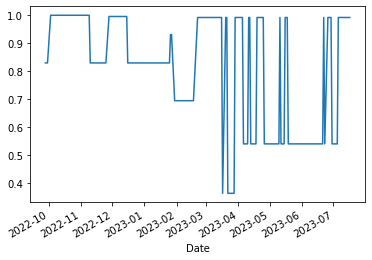

In [ ]:
pd.Series([x[1] for x in modelo.predict_proba(X_full.dropna())], index=X_full.dropna().index).iloc[-200:].plot()

<AxesSubplot:title={'center':'Predicción de probabilidad de suba FW   //   Arbol de Decisión'}, xlabel='Date'>

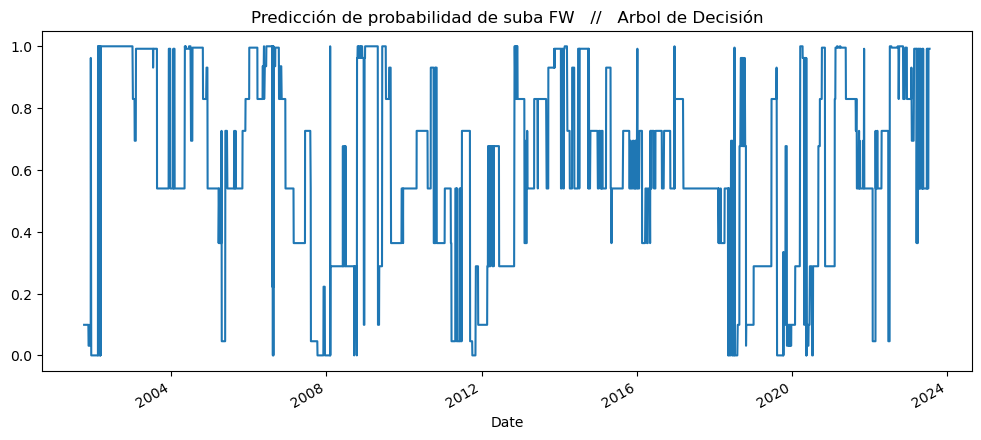

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

t = 'Predicción de probabilidad de suba FW   //   Arbol de Decisión'
pd.Series([x[1] for x in modelo.predict_proba(X_full.dropna())], index=X_full.dropna().index).plot(figsize=(12,5), title=t)

## Graficamos el modelo

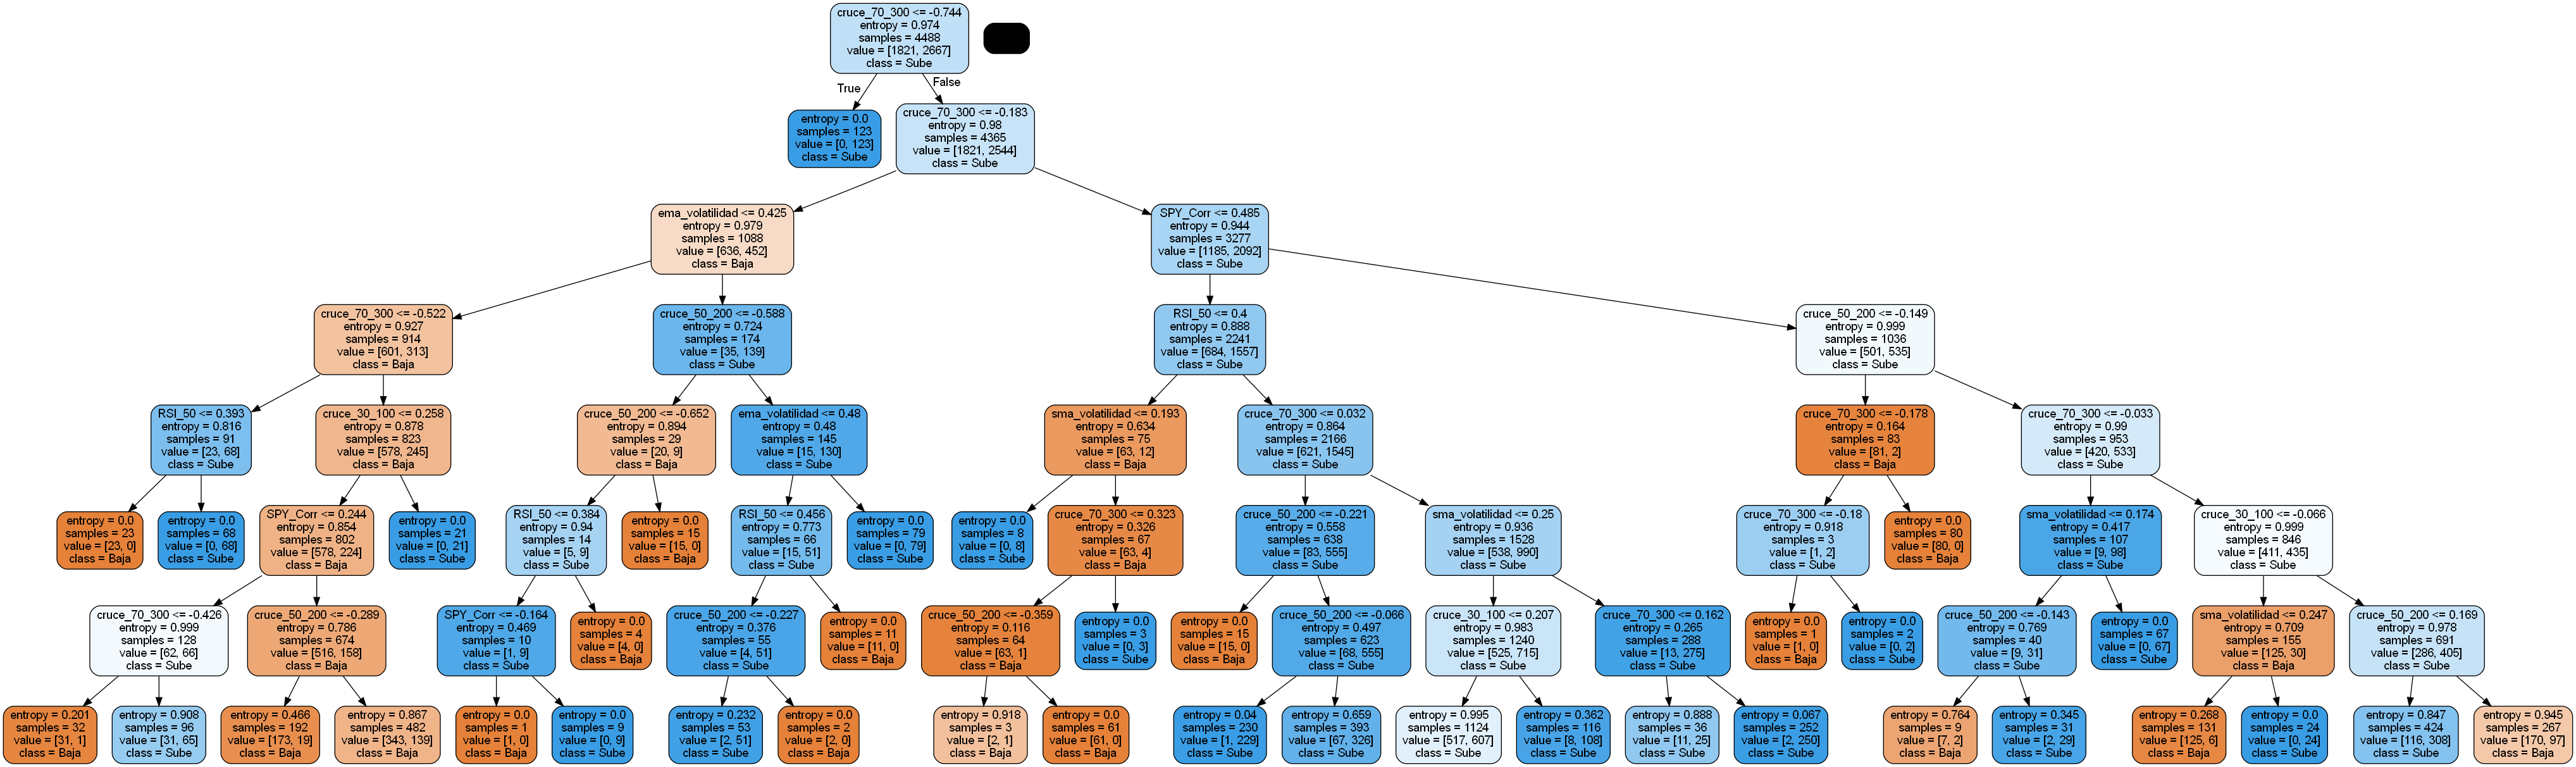

In [ ]:
# pip install pydotplus

from IPython.display import Image
from sklearn import tree
import pydotplus

# Esto si lo usan en local con anaconda
#import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Baja','Sube']

dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=X.columns,
                                class_names=targets, rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)

# Lo mismo esto si lo usan en local y quieren guardar la imagen
# guardo la imagen en disco
# graph.write_png("imagenes/gashe2.png")

# imprimo en pantalla
Image(graph.create_png())

In [ ]:
# Si quieren la data para parsear del arbol:
dot_data[:500]

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="cruce_70_300 <= -0.744\\nentropy = 0.974\\nsamples = 4488\\nvalue = [1821, 2667]\\nclass = Sube", fillcolor="#c0e0f7"] ;\n1 [label="entropy = 0.0\\nsamples = 123\\nvalue = [0, 123]\\nclass = Sube", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="cruce_70_300 <= -0.183\\nentropy = 0.98\\nsamples = 4365\\nvalue = [1821, 2544]\\nc'

## Overfiteamos

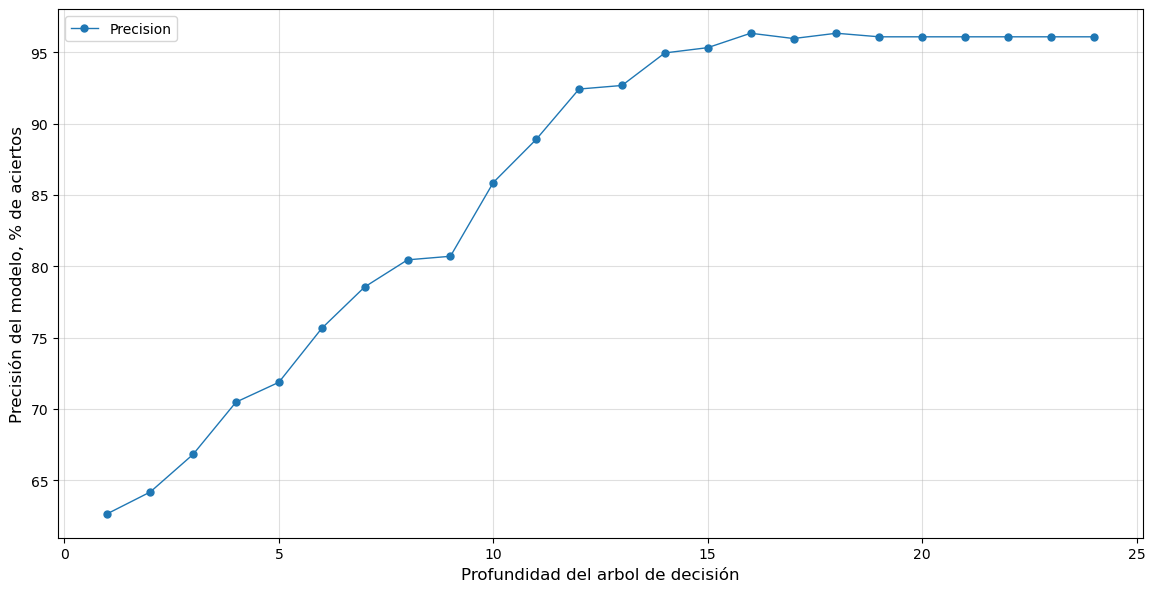

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
aciertos = []
for i in range(1,25):
    # Vamos a instanciar un modelo para cada profundidad hassta 25 niveles
    modelo = DecisionTreeClassifier(criterion = 'entropy', max_depth=i, random_state=0) #Definimos modelo
    modelo.fit(X_train, y_train) # Entrenamos
    y_pred = modelo.predict(X_test) # Corremos las predicciones
    m = np.array(confusion_matrix(y_test, y_pred)) # medimos que tan bien nos fue con OOS
    mp = (m/m.sum().sum() *100).round(2)
    aciertos.append( round(mp[0][0]+mp[1][1],2) )

aciertosTot = pd.DataFrame(aciertos, index=list(range(1,25)))
ax.plot(aciertosTot, markersize=5, marker='o', label='Precision', lw=1)
ax.grid(alpha=0.4)
ax.legend()
ax.set_ylabel('Precisión del modelo, % de aciertos', fontsize=12)
ax.set_xlabel('Profundidad del arbol de decisión', fontsize=12)
plt.show()

# Hay una profundidad razonable en un arbol de decision?

No, obvio que depende de los datos, del poder predictivo de los mismos, del nivel que querramos lograr de predictibilidad etc etc, pero podemos estimar una cantidad de niveles para obtener clusteres de decision de no menos de 30 datos (o un minimo a considerar segun las circunstancias), con esto no nos aseguramos nada, pero al menos ponemos una barrera al overfitting burdo

$$ \large 30 \cdot 2^{levels} \leq  |\text{X_train}| $$

Esto vale solo si cada nodo del arbol partiera en 2 la muestra de su nodo, cosa que no es cierta pero es solo un modelo naive para hacer la estimacion

In [ ]:
# podemos buscar para que nivel tenemos al menos 30 datos
30 * 2**7 <= len(X_train)

True

In [ ]:
30 * 2**8 <= len(X_train)

False

In [ ]:
for i in range(1,10):
    print(i, 30 * 2**i <= len(X_train))

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 False
9 False


In [ ]:
import math

# me da que tiene que ser menos que 6,69 para tener un minimo de 30 datos por bloque
math.log(len(X_train)/30, 2)

7.224966365000275

# Repaso en limpio

In [ ]:
import yfinance as yf, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

data = yf.download('GGAL', start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change().rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

data['target'] = 0
data.loc[data.fw >= 0 , 'target'] = 1

data_full = data.copy() # Esto nos va a servir despues cuando necesitemos los de hoy (sin etiquetas aun)
data = data.round(4).dropna()

y = list(data['target'])
X = data.iloc[:,-8:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55)
#X_train, X_test = X.iloc[:4500], X.iloc[4500:]
#y_train, y_test = y[:4500], y[4500:]


modelo = DecisionTreeClassifier(criterion = 'gini', max_depth=7, random_state=0)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

m = np.array(confusion_matrix(y_test, y_pred, normalize='all')).round(2)

ultimos = data_full.iloc[-5:,-8:-1]
prediccion_ultimos = modelo.predict_proba(ultimos)

m, prediccion_ultimos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(array([[0.31, 0.11],
        [0.07, 0.51]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.]]))

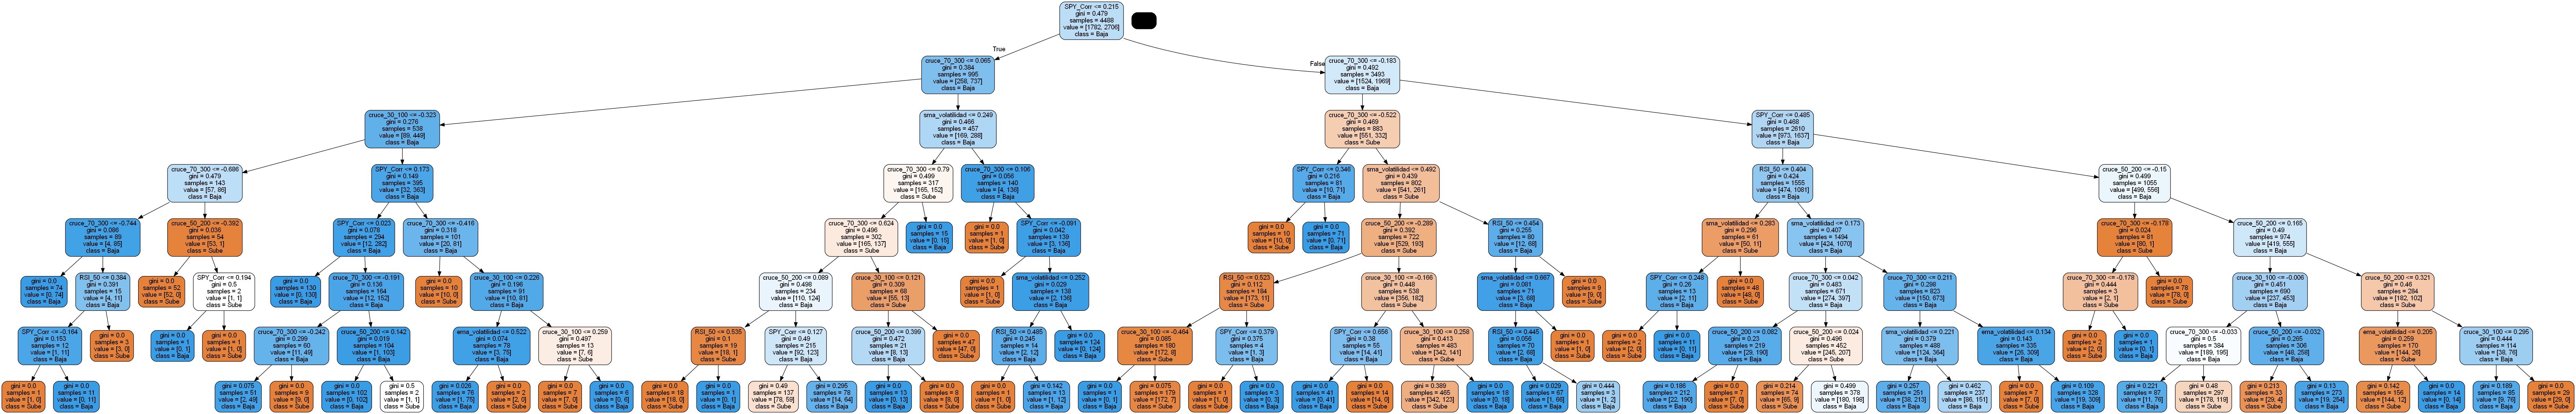

In [ ]:
# Recuerden esta linea para ejecutar local con anaconda
# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Sube','Baja']

dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=X.columns,
                                class_names=targets, rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)

# imprimo en pantalla
Image(graph.create_png())

# Se acuerdan de la serializacion?

In [ ]:
import pickle

with open('modelo_arboles.dat' , 'wb') as file:
    pickle.dump(modelo, file)

# Reiniciamos kernel y probamos modelo pre-fiteado

In [ ]:
import pickle
with open('modelo_arboles.dat' , 'rb') as file:
    m_loaded = pickle.load(file)

In [ ]:
m_loaded

DecisionTreeClassifier(max_depth=7, random_state=0)

In [ ]:
import yfinance as yf, numpy as np, pandas as pd

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

data = yf.download('GGAL', start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change().rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

ultimos = data.iloc[-5:,-7:]
prediccion_ultimos = m_loaded.predict_proba(ultimos)
prediccion_ultimos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

# OverSampling y UnderSampling

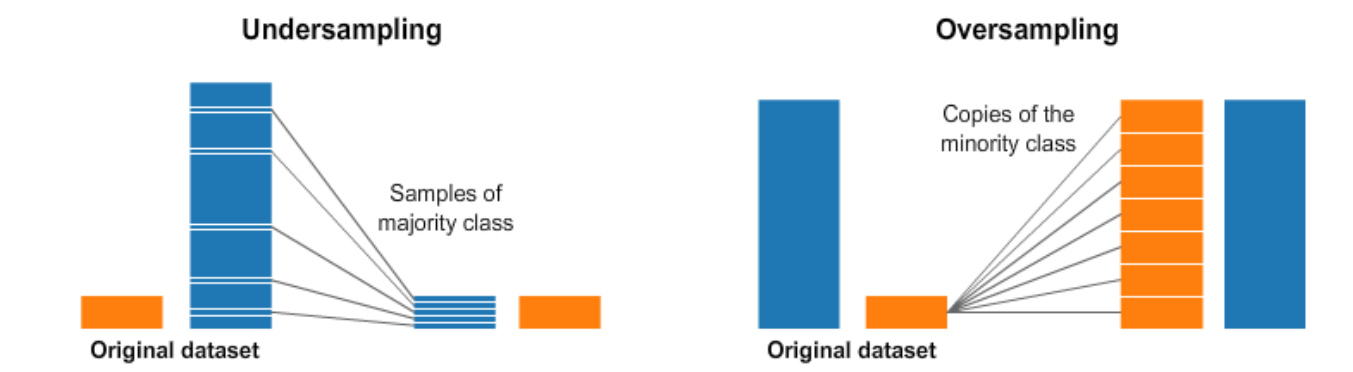

In [ ]:
# quiero predecir la probabilidad de que GGAL se vuele mas del 20% el proximo mes..

## Over Sampling:

Simplemente repitiendo al azar

* <b>RandomOverSampler</b>

Sintéticos

    * SMOTE
    * BorderlineSMOTE (Líneas de separación jerarárquicas)
    * KMeansSMOTE (c/modelo de agrupamiento KMeans)
    * SVMSMOTE (c/modelo de agrupamiento SVM)
    * SMOTEN (para predictores discretos)
    * SMOTENC (mezcla de predictores continuos y discretos)
    * ADASYN (sinteticos adaptativos)

Paper original <b>SMOTE</b>, DOI: 10.1613/jair.301
<br>https://www.jair.org/index.php/jair/article/view/10302/24590

<b>BorderLine</b> DOI DOI:10.1007/11538059_91
<br>https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf

<b>ADASYN</b> DOI:10.1109/IJCNN.2008.4633969
<br>https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf

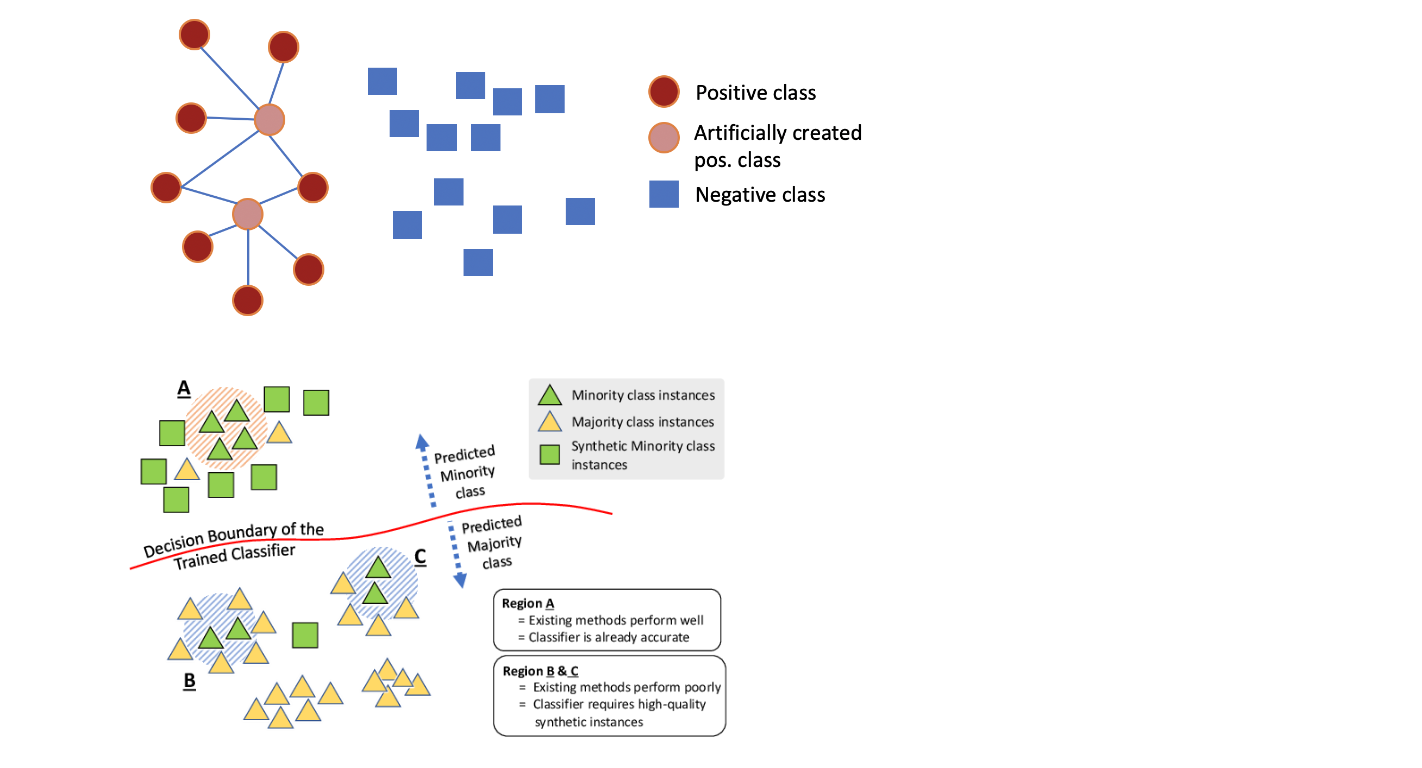

## Under Sampling

* <b>RandomUnderSampler</b>

* <b>NearMiss</b> (usa KNN, busca mas separacion de grupos)
* <b>ClusterCentroids</b> (Usa KMeans, remueve primero los mas parecidos, busca mas variabilidad, me gusta mas en la bolsa)
* CondensedNearestNeighbour (Busca la zona mas densa posible)
* EditedNearestNeighbours ENN (remueve primeros los korea del centro)
* RepeatedEditedNearestNeighbours (ENN recursivo)
* AllKNN (ENN adaptativo)
* InstanceHardnessThreshold (Usa cortes de clustering jerárquico y dendrogramas)
* NeighbourhoodCleaningRule (remueve primero los mas discordantes, saca ruido)
* OneSidedSelection
* TomekLinks

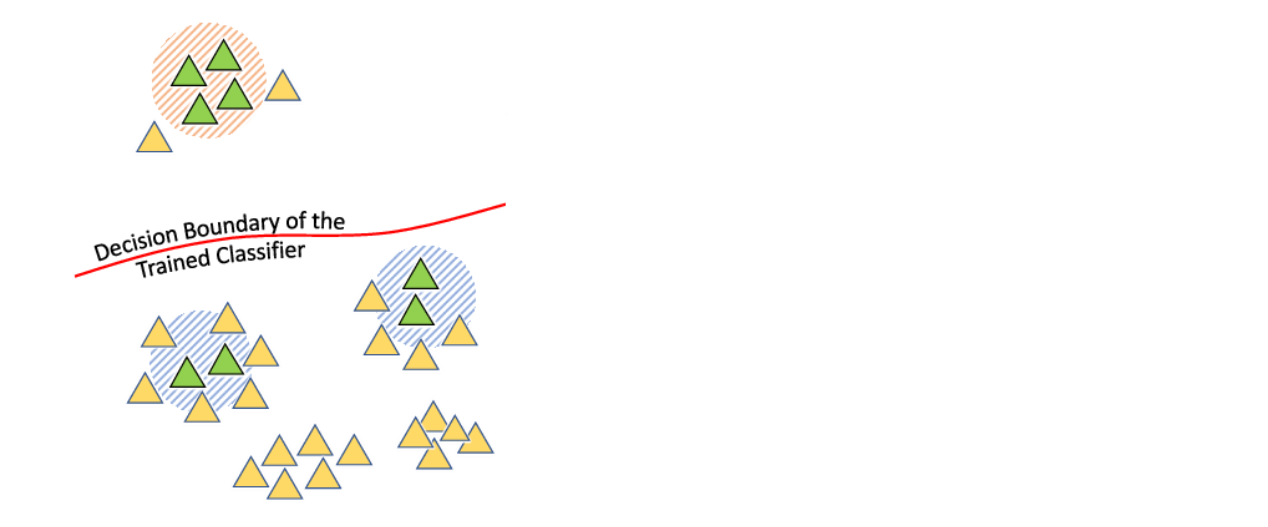

<b>NearMiss</b>
<br>https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf

<b>CondensedNearestNeighbour</b> DOI 10.1109/TIT.1968.1054155
<br>https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1979-IEEE_TIT-Chidananda-IS-MNV.pdf

OneSideSelect
<br>https://sci2s.ugr.es/keel/pdf/algorithm/congreso/kubat97addressing.pdf

Neighboorhood Cleaning Rule
<br>https://www.scirp.org/pdf/JBiSE20101000009_16323745.pdf

InstanceHardnessThreshold
<br>https://link.springer.com/content/pdf/10.1007/s10994-013-5422-z.pdf

<b>Tomek</b> DOI 10.4236/jilsa.2015.74010
<br>https://www.scirp.org/(S(i43dyn45teexjx455qlt3d2q))/journal/paperinformation.aspx?paperid=60996

## Instalación e importación

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
from imblearn import over_sampling as os
from imblearn import under_sampling as us

## Ejemplos

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

smas = ((30, 100), (50, 200), (70, 300))
ventana = 200

data = yf.download('GGAL', start='2000-01-01', auto_adjust=True)
spy = yf.download('SPY', start='2000-01-01', auto_adjust=True)

dif = data['Close'].diff()
RSI_CONS = 50
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/RSI_CONS).mean()
ema_loss = loss.ewm(alpha=1/RSI_CONS).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Close'].pct_change()
data['fw'] = data['Close'].shift(-ventana)/data['Close']-1
data[f'RSI_{RSI_CONS}'] = rsi/100
data['sma_volatilidad'] = data['pctChange'].rolling(50).std() * 50**0.5
data['ema_volatilidad'] = data['pctChange'].ewm(span=40).std() * 40**0.5
data['SPY_Corr'] = data.Close.pct_change().rolling(40).corr(spy.Close.pct_change())
c1 = f'cruce_{smas[0][0]}_{smas[0][1]}'
c2 = f'cruce_{smas[1][0]}_{smas[1][1]}'
c3 = f'cruce_{smas[2][0]}_{smas[2][1]}'
data[c1] = data['Close'].rolling(smas[0][0]).mean()/data['Close'].rolling(smas[0][1]).mean()-1
data[c2] = data['Close'].rolling(smas[1][0]).mean()/data['Close'].rolling(smas[1][1]).mean()-1
data[c3] = data['Close'].rolling(smas[2][0]).mean()/data['Close'].rolling(smas[2][1]).mean()-1

data.dropna(inplace=True)

data['se_vuela'] = np.where(data.fw > 0.9, 1, 0)

df = data.iloc[:, 8:]
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
Date                                                                   
2001-10-05         0.355784         0.328763  0.423873     -0.335082   
2001-10-08         0.353551         0.320923  0.424210     -0.343647   
2001-10-09         0.353181         0.316747  0.416906     -0.351005   
2001-10-10         0.366384         0.339699  0.483811     -0.360456   
2001-10-11         0.384895         0.371004  0.505908     -0.367349   
...                     ...              ...       ...           ...   
2022-09-21         0.225740         0.200520  0.505062      0.065724   
2022-09-22         0.223920         0.196427  0.476093      0.070248   
2022-09-23         0.227078         0.202273  0.475183      0.072467   
2022-09-26         0.235488         0.213302  0.447560      0.072874   
2022-09-27         0.240413         0.216349  0.433976      0.071439   

            cruce_50_200  cruce_70_300  se_vuela  
Date                                              
2001-10-05     -0.371485     -0.302954         0  
2001-10-08     -0.378498     -0.310955         0  
2001-10-09     -0.384733     -0.319523         0  
2001-10-10     -0.390179     -0.327763         0  
2001-10-11     -0.394556     -0.335485         0  
...                  ...           ...       ...  
2022-09-21     -0.086143     -0.140463         1  
2022-09-22     -0.080406     -0.138255         1  
2022-09-23     -0.074819     -0.136725         1  
2022-09-26     -0.070399     -0.136229         1  
2022-09-27     -0.066860     -0.135925         1  

[5281 rows x 7 columns]

In [ ]:
df.groupby('se_vuela').size()

se_vuela
0    4526
1     755
dtype: int64

In [ ]:
X, Y = df.iloc[:,:-1], df.iloc[:,-1]

### OS, Random, SMOTE

In [ ]:
# Uso oversampling al azar
# Repite muestras del df original aleatoriamente

X_os, Y_os = os.RandomOverSampler().fit_resample(X,Y)

In [ ]:
df_os = pd.concat([X_os,Y_os], axis=1)
df_os

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  cruce_50_200  \
0            0.355784         0.328763  0.423873     -0.335082     -0.371485   
1            0.353551         0.320923  0.424210     -0.343647     -0.378498   
2            0.353181         0.316747  0.416906     -0.351005     -0.384733   
3            0.366384         0.339699  0.483811     -0.360456     -0.390179   
4            0.384895         0.371004  0.505908     -0.367349     -0.394556   
...               ...              ...       ...           ...           ...   
9047         0.588922         0.534730  0.034603     -0.307669     -0.688817   
9048         0.179470         0.152794  0.376563     -0.079398      0.128570   
9049         0.155518         0.138328  0.131690      0.023974      0.096437   
9050         2.033449         1.711413 -0.127104      0.020307     -0.502114   
9051         0.570062         0.524997  0.028971     -0.322504     -0.683339   

      cruce_70_300  se_vuela  
0        -0.302954         0  
1        -0.310955         0  
2        -0.319523         0  
3        -0.327763         0  
4        -0.335485         0  
...            ...       ...  
9047     -0.823448         1  
9048      0.409380         1  
9049      0.357617         1  
9050     -0.808359         1  
9051     -0.820224         1  

[9052 rows x 7 columns]

In [ ]:
df_os.groupby('se_vuela').size()

se_vuela
0    4526
1    4526
dtype: int64

In [ ]:
df.groupby('se_vuela').mean()

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
se_vuela                                                             
0                0.228131         0.204159  0.379203      0.004493   
1                0.491348         0.438959  0.293152      0.001405   

          cruce_50_200  cruce_70_300  
se_vuela                              
0             0.022700      0.046844  
1            -0.045008     -0.116970

In [ ]:
# chequeamos como cambian los features luego del oversampling
# Fijense que la columna del 0 no cambia porque no la tocamos, pero la del 1 (se vuela) si que cambia levemente

X_os, Y_os = os.RandomOverSampler(random_state=0).fit_resample(X,Y)
df_os = pd.concat([X_os,Y_os], axis=1)
df_os.groupby('se_vuela').mean()

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
se_vuela                                                             
0                0.228131         0.204159  0.379203      0.004493   
1                0.505165         0.449829  0.290424      0.004491   

          cruce_50_200  cruce_70_300  
se_vuela                              
0             0.022700      0.046844  
1            -0.048577     -0.123643

In [ ]:
X_os, Y_os = os.SMOTE(random_state=0).fit_resample(X,Y)
df_os = pd.concat([X_os,Y_os], axis=1)
df_os.groupby('se_vuela').mean()

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
se_vuela                                                             
0                0.228131         0.204159  0.379203      0.004493   
1                0.479509         0.427538  0.294268      0.002763   

          cruce_50_200  cruce_70_300  
se_vuela                              
0             0.022700      0.046844  
1            -0.040701     -0.109592

### US, Random, NearMiss,

In [ ]:
df.groupby('se_vuela').size()

se_vuela
0    4526
1     755
dtype: int64

In [ ]:
 df.groupby('se_vuela').mean()

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
se_vuela                                                             
0                0.228131         0.204159  0.379203      0.004493   
1                0.491348         0.438959  0.293152      0.001405   

          cruce_50_200  cruce_70_300  
se_vuela                              
0             0.022700      0.046844  
1            -0.045008     -0.116970

In [ ]:
# chequeamos como cambian los features luego del undersampling
# Fijense que la columna del 0 ahora cambia porque ahora es la que achicamos, pero la del 1 (se vuela) ahora no la tocamos y queda igual

X_us, Y_us = us.RandomUnderSampler(random_state=0).fit_resample(X,Y)
df_us = pd.concat([X_us,Y_us], axis=1)
#df_us.groupby('se_vuela').size(),
df_us.groupby('se_vuela').mean()

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
se_vuela                                                             
0                0.227055         0.203482  0.378535      0.015021   
1                0.491348         0.438959  0.293152      0.001405   

          cruce_50_200  cruce_70_300  
se_vuela                              
0             0.030551      0.051258  
1            -0.045008     -0.116970

In [ ]:
X_us, Y_us = us.NearMiss().fit_resample(X,Y)
df_us = pd.concat([X_us,Y_us], axis=1)
#df_us.groupby('se_vuela').size(),
df_us.groupby('se_vuela').mean()

sma_volatilidad  ema_volatilidad  SPY_Corr  cruce_30_100  \
se_vuela                                                             
0                0.211381         0.185134  0.376624      0.006417   
1                0.491348         0.438959  0.293152      0.001405   

          cruce_50_200  cruce_70_300  
se_vuela                              
0             0.009749      0.038796  
1            -0.045008     -0.116970

# Criterio de Entropía e impureza de gini

## Fórmulas

$$ {\text{Ganancia de información, Entropia}}(S)= \large - \sum _{i=1}^{n}p_{i}\log _{2}p_{i} $$

$$ {\text{Impureza de Gini} \hspace{0.5cm}  \large I_{G}(p)=\sum _{i=1}^{m}p_{i}(1-p_{i})=\sum _{i=1}^{m}(p_{i}-{p_{i}}^{2})=1-\sum _{i=1}^{m}{p_{i}}^{2}} $$

## Implementamos las funciones

In [ ]:
from math import log
import numpy as np
import pandas as pd

def gini(p):
    return 1 - (p**2 + (1-p)**2)

def entropy(p, base=2):
    try:
        var =  abs(p*log(p, base)+(1-p)*log(1-p, base))
        return var
    except (ValueError):
        return 0

In [ ]:
p_subas = np.linspace(0,1,100, endpoint=False)
data_gini = [gini(x) for x in p_subas]
data_entropy = [entropy(x) for x in p_subas]
df = pd.DataFrame(zip(p_subas, data_gini, data_entropy), columns=['P','Gini','Entropy']).set_index('P')
df

Gini   Entropy
P                     
0.00  0.0000  0.000000
0.01  0.0198  0.080793
0.02  0.0392  0.141441
0.03  0.0582  0.194392
0.04  0.0768  0.242292
...      ...       ...
0.95  0.0950  0.286397
0.96  0.0768  0.242292
0.97  0.0582  0.194392
0.98  0.0392  0.141441
0.99  0.0198  0.080793

[100 rows x 2 columns]

<AxesSubplot:xlabel='P'>

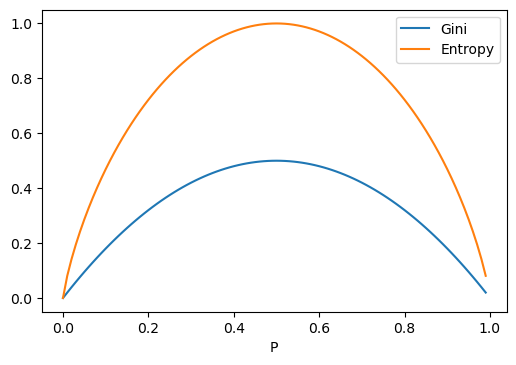

In [ ]:
df.plot()

<AxesSubplot:xlabel='P'>

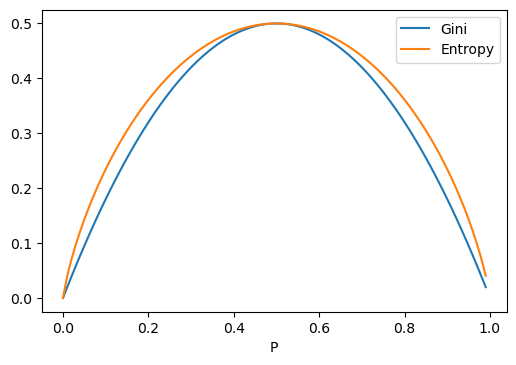

In [ ]:
df_escalada = df.copy()
df_escalada['Entropy'] /= 2
df_escalada.plot()

## Sensibilidad, Derivamos

Text(0.5, 1.0, 'Zona mas definida')

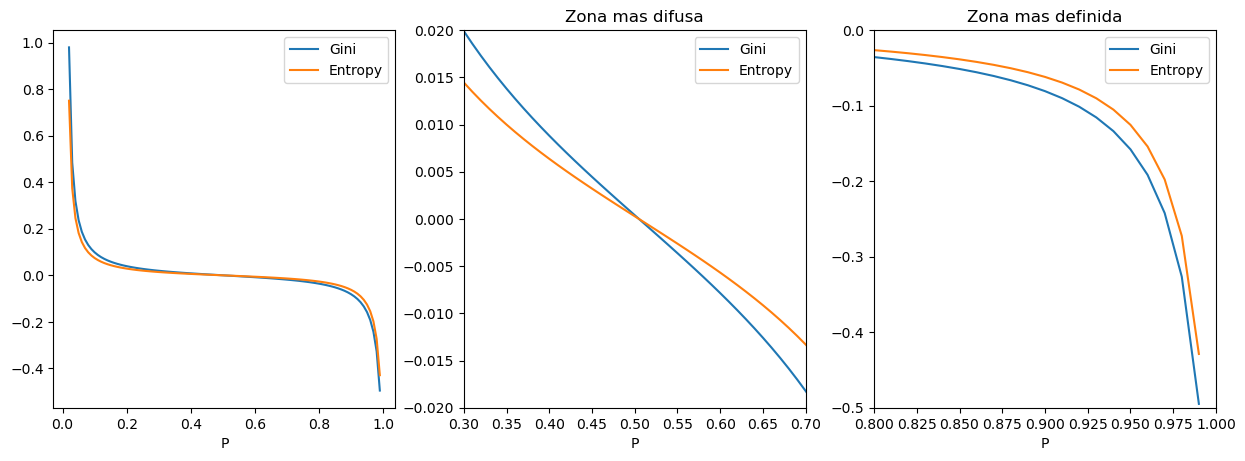

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5), ncols=3)

df.pct_change().plot(ax=ax[0])
df.pct_change().plot(xlim=(.3,.7), ylim=(-.02,.02), ax=ax[1])
df.pct_change().plot(xlim=(.8,1), ylim=(-.5,0), ax=ax[2])
ax[1].set_title('Zona mas difusa')
ax[2].set_title('Zona mas definida')

In [ ]:
tasas = df.pct_change().abs().iloc[2:]
tasas.mean()

Gini       0.067372
Entropy    0.052136
dtype: float64